In [1]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

## Reconstruction Function

In [3]:
def func(t):
    return 3*np.sin(t) + np.sin(np.sqrt(2)*t)

(0.0, 200.0)

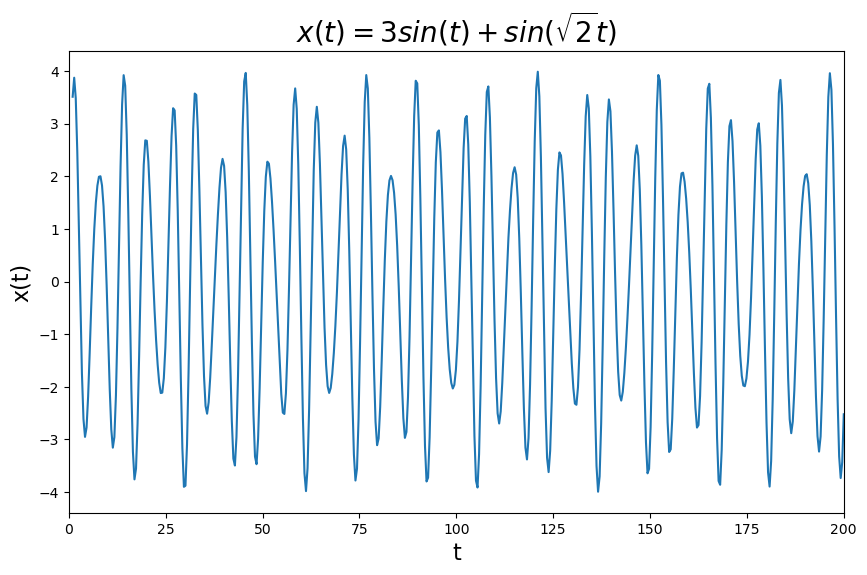

In [4]:
tspan = np.linspace(1,200,500)
y = func(tspan)

# let's look at x(t)
plt.figure(figsize=(10,6))
plt.plot(tspan,y)

plt.xlabel('t', fontsize=16)
plt.ylabel('x(t)', fontsize=16)
plt.title(r'$x(t) = 3sin(t) + sin(\sqrt{2} t)$', fontsize=20)
plt.xlim(0,200)

# not chaotic -- no expontential growth in distance between trajectories with slightly different initial conditions

## Simple Example

Adapted from Strogatz Fig. 12.4.5

In [2]:
def reconstructPhase(sv, tau, n):
    '''
    reconstructPhase()
        samples state vector 'sv' at delay tau, with dimension n
    '''
    state = []
    for _ in range(n): state.append([])
    
    for i in range(0, len(sv)-(n*tau), tau):
        for dim in range(n):
            state[dim].append(sv[i+(dim*tau)])
            
    return state

## Let's reconstruct

Text(0.5, 1.0, '2D Reconstruction')

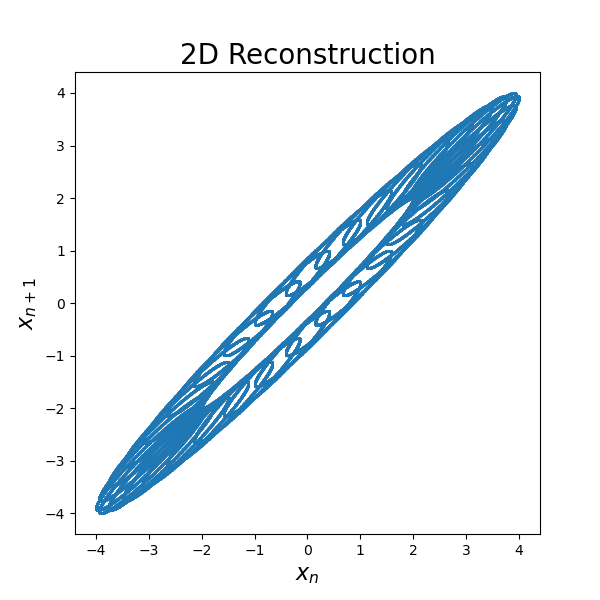

In [17]:
tau = np.pi/16
tspan = np.arange(0,10000,tau) #(start, stop, step)
y = func(tspan)

# now let's see what the phase space reconstruction does
s2 = reconstructPhase(y, 1, 2)

fig = plt.figure(figsize=(6,6))

plt.scatter(s2[0], s2[1], s=1)
plt.xlabel(r'$x_n$', fontsize=16)
plt.ylabel(r'$x_{n+1}$', fontsize=16)
plt.title('2D Reconstruction', fontsize=20)

Text(0.5, 0.92, '3D Reconstruction')

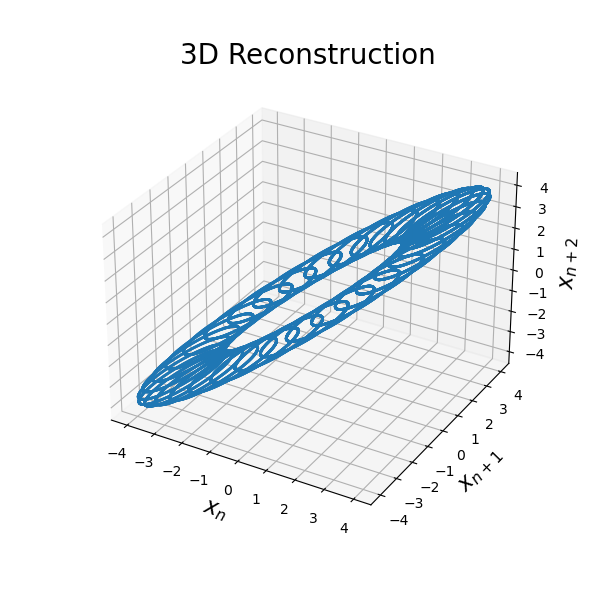

In [18]:
%matplotlib widget

s3 = reconstructPhase(y, 1, 3)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(s3[0], s3[1], s3[2], s=1)

ax.set_xlabel(r'$x_n$', fontsize=16)
ax.set_ylabel(r'$x_{n+1}$', fontsize=16)
ax.set_zlabel(r'$x_{n+2}$', fontsize=16)
ax.set_title('3D Reconstruction', fontsize=20)